In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Courses\\python_data_exploration_tutorial\\"
filename = ROOT + 'data\\london_merged.csv'

In [3]:
# Import data
data_london = pd.read_csv(filename, delimiter=',') #, nrows = 1000)

In [6]:
data_london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


| column name | stands for |
| -- | -- | 
| timestamp | timestamp |
| cnt | number | 
| t1 | temperature | 
| t2 | temperature_feels |
| hum | humidity% |
| wind_speed | km/h |
| weather_code | code |
| is_holiday | boolean |
| is_weekend | boolean |
| season | season_code |

## Explore data

In [13]:
data_london.hum[:10]

0     93.0
1     93.0
2     96.5
3    100.0
4     93.0
5     93.0
6    100.0
7    100.0
8     96.5
9    100.0
Name: hum, dtype: float64

(array([  25.,  148.,  582., 1154., 1721., 2492., 3423., 3963., 2910.,
         996.]),
 array([ 20.5 ,  28.45,  36.4 ,  44.35,  52.3 ,  60.25,  68.2 ,  76.15,
         84.1 ,  92.05, 100.  ]),
 <a list of 10 Patch objects>)

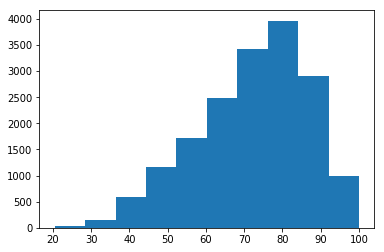

In [14]:
plt.hist(data_london.hum, 10)

Dataset on bike rental form UCI:
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered 

In [15]:
ROOT = "C:\\OneDrive - Netherlands eScience Center\\Courses\\python_data_exploration_tutorial\\"
filename = ROOT + 'data\\hour.csv'

In [16]:
# Import data
data_bike_rent = pd.read_csv(filename, delimiter=',') #, nrows = 1000)

In [17]:
data_bike_rent.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

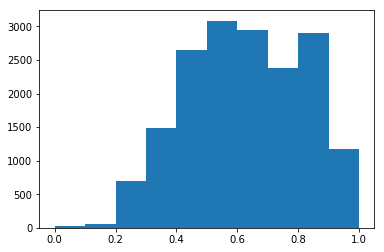

In [18]:
plt.hist(data_bike_rent.hum, 10)

In [58]:
# Correlation matrix
def plot_corr_matrix(df, graphWidth):
    
    # Remove NaN's
    df = df.dropna('columns')
    
    # Calculate correlation matrix
    corr = df.corr()
    
    # Plot
    plt.figure(num=None, figsize=(graphWidth, graphWidth)) #, dpi=80, facecolor='w', edgecolor='k')
    fig = plt.matshow(corr, fignum = 1, cmap = 'inferno')
    # Set axis labels
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    
    plt.colorbar(fig)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

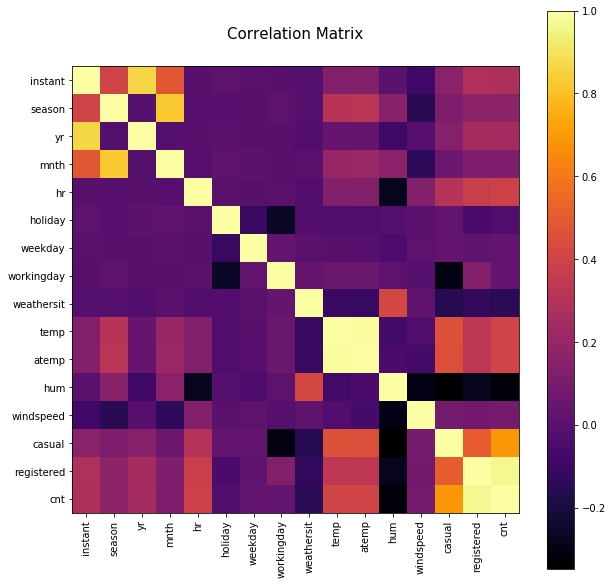

In [59]:
plot_corr_matrix(data_bike_rent, 10)